In [1]:
import sys, os
import tensorflow as tf
sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/")

# import customized modules
import preprocess, data_generator, check_result, metrics, loss, train

sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/Pyramid")
import pyramid

# Insert Path
# {model_name}_{epoch}ep_{model_inpusize}_{Generator | aG/fG/sG}
FILE_NAME = 'pyramid_50ep_1024_fG_w_slice'
INPUT_SHAPE = (1024, 1024, 1)
MODEL_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/Pyramid/model_parameters/" + FILE_NAME + ".tf"
HISTORY_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/Pyramid/history/" + FILE_NAME + '_history' ".json"

TRAIN_SOURCE = '/visuworks/Dataset/Selected Dataset 3/Train'
TEST_SOURCE = '/visuworks/Dataset/Selected Dataset 3/Test'

2024-02-07 09:23:17.589280: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-07 09:23:17.589308: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-07 09:23:17.590191: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-07 09:23:17.595073: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-07 09:23:18.155906: W tensorflow/compiler/tf2

In [2]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy,}

# Create augmentation
# Create augmentation
train_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0])
test_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0], is_train=False)

# Create train, test generator
train_generator = data_generator.FullSizedDataGenerator(
    TRAIN_SOURCE,
    batch_size=1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=True,
    is_test=False,
    slice_black=True,
    augmentation= train_preproc
)

test_generator = data_generator.FullSizedDataGenerator(
    TRAIN_SOURCE,
    batch_size=1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    is_test=True,
    slice_black=True,
    augmentation= test_preproc
)

# Create model
model = pyramid.build_model(INPUT_SHAPE)
model.summary()

2024-02-06 07:19:26.803160: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-06 07:19:26.838026: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-06 07:19:26.838250: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1024, 1024, 1)]      0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 1024, 1024, 16)       32        ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 1024, 1024, 8)        16        ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 1024, 1024, 16)       160       ['input_1[0][0]']             
                                                                                              

In [ ]:
train.model_train(model,
                  epoch = 50,
                  train_generator = train_generator,
                  test_generator = test_generator,
                  model_path = MODEL_PATH,
                  history_path = HISTORY_PATH,
                  save_every_epoch=True,
                  apply_weight_decay=True)

In [ ]:
check_result.plot_history(HISTORY_PATH)

In [2]:
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy,
                  'f1_score' : metrics.f1_score,
                  'iou' : metrics.iou}

model_param_path = '/visuworks/Blindless_AIFFELTON/Ablation Study/Pyramid/model_parameters/pyramid_50ep_1024_fG_w_slice.tf'

test_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0], is_train=False)
test_generator = data_generator.FullSizedDataGenerator(
    TEST_SOURCE,
    batch_size=1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    is_test=True,
    slice_black=True,
    augmentation= test_preproc
)

loss, sen, spe, acc ,f1, iou = metrics.retrive_all_evaluation_of_test_dataset(test_generator, model_param_path, custom_objects)

1번째 epoch 결과


2024-02-06 14:53:57.279260: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-06 14:53:57.310592: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-06 14:53:57.310805: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

305/305 [==============================] - 29s 65ms/step - loss: 0.4368 - sensitivity: 0.7419 - specificity: 0.9158 - accuracy: 0.9045 - f1_score: 0.5167 - iou: 0.3618
2번째 epoch 결과
305/305 [==============================] - 22s 70ms/step - loss: 0.3761 - sensitivity: 0.7064 - specificity: 0.9473 - accuracy: 0.9315 - f1_score: 0.5774 - iou: 0.4224
3번째 epoch 결과
305/305 [==============================] - 20s 62ms/step - loss: 0.3397 - sensitivity: 0.6152 - specificity: 0.9738 - accuracy: 0.9497 - f1_score: 0.6113 - iou: 0.4588
4번째 epoch 결과
305/305 [==============================] - 21s 67ms/step - loss: 0.3317 - sensitivity: 0.6960 - specificity: 0.9638 - accuracy: 0.9460 - f1_score: 0.6257 - iou: 0.4759
5번째 epoch 결과
305/305 [==============================] - 19s 60ms/step - loss: 0.3270 - sensitivity: 0.6634 - specificity: 0.9703 - accuracy: 0.9497 - f1_score: 0.6300 - iou: 0.4810
6번째 epoch 결과
305/305 [==============================] - 21s 67ms/step - loss: 0.3147 - sensitivity: 0.6807 -

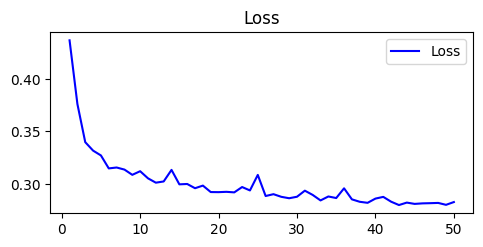

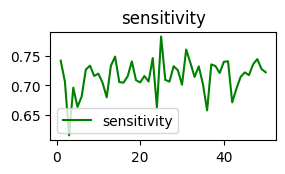

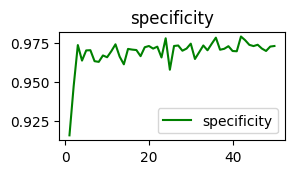

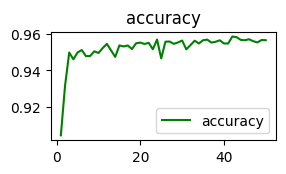

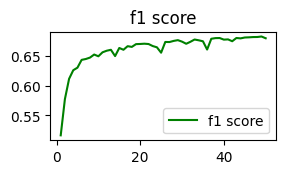

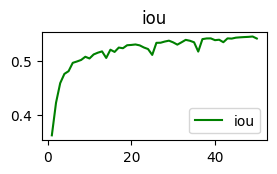

<Figure size 640x480 with 0 Axes>

: 

In [4]:
metrics.plot_test_evaluation_result(loss, sen, spe, acc ,f1, iou)